In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [3]:
polytrain=pd.read_csv("polytrain.csv")

In [7]:
polytest=pd.read_csv("polytest.csv")

In [8]:
polytest.shape

(50, 1)

In [9]:
polytrain.shape

(200, 2)

In [10]:
x=polytrain.iloc[:,:1]

In [11]:
y=polytrain.iloc[:,1:2]

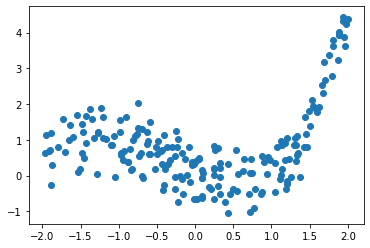

In [12]:
plt.scatter(x,y)

In [13]:
transformator=PolynomialFeatures(3,include_bias=False)

In [14]:
transformator.fit(x,y)

PolynomialFeatures(degree=3, include_bias=False, interaction_only=False,
                   order='C')

In [15]:
xtrain=transformator.transform(x)

In [16]:
model=LinearRegression()

In [17]:
model.fit(xtrain,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
model.coef_

array([[-0.94753365,  0.59322683,  0.49470415]])

In [19]:
model.intercept_

array([0.01406425])

In [20]:
model.score(xtrain,y)

0.8109845981060422

In [21]:
xtest=polytest

In [22]:
xxtest=transformator.transform(xtest)

In [23]:
ytest=model.predict(xxtest)

In [24]:
polyresult=pd.read_csv("polyresult.csv")

In [33]:
from sklearn.metrics import r2_score, mean_squared_error

In [34]:
r2_score(polyresult,ytest)

0.8988336465601928

In [35]:
polytestresult2=pd.read_csv("polytest+result2.csv")

In [36]:
_=polytestresult2

In [37]:
## x ---> train + test
## y ---> train + result

In [38]:
xtest["y"]=polyresult

In [39]:
_=polytrain

In [40]:
_=xtest

In [41]:
gunceldata=pd.concat([polytrain, xtest], axis=0)

In [46]:
gunceldata.shape

(250, 2)

In [42]:
x2=gunceldata.iloc[:,:1]

In [43]:
y2=gunceldata.iloc[:,1:2]

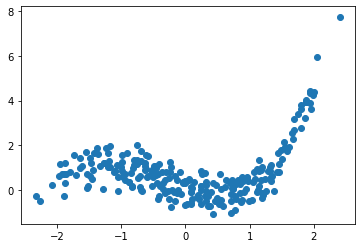

In [44]:
plt.scatter(x2,y2)

In [46]:
transformator2=PolynomialFeatures(3,include_bias=False)

In [47]:
transformator2.fit(x2,y2)

PolynomialFeatures(degree=3, include_bias=False, interaction_only=False,
                   order='C')

In [48]:
x2train=transformator2.transform(x2)

In [217]:
model2=LinearRegression()

In [218]:
model2.fit(x2train,y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [198]:
model2.coef_

array([[-0.93921843,  0.59778581,  0.4915455 ]])

In [199]:
model2.intercept_

array([0.03343374])

In [206]:
model2.score(x2train,y2)

0.8371756386520336

In [207]:
x2test=polytestresult2.iloc[:,:1]

In [208]:
xx2test=transformator2.transform(x2test)

In [209]:
y2test=model2.predict(xx2test)

In [244]:
yresult2=polytestresult2.iloc[:,1:2]

In [245]:
r2_score(yresult2,y2test)

0.4646467421461211

In [230]:
x2['x']

0     1.879082
1    -0.349478
2     1.253709
3     0.867197
4     1.051625
        ...   
45    1.091106
46    0.959061
47   -0.312158
48    0.768991
49   -0.453890
Name: x, Length: 250, dtype: float64

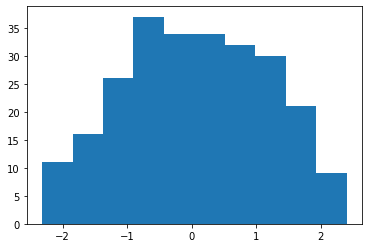

In [231]:
_=plt.hist(x2['x'],)

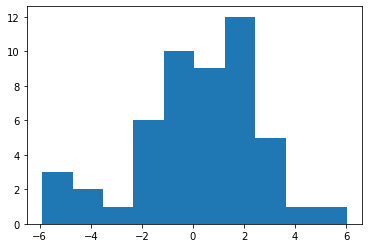

In [235]:
_=plt.hist(x2test['x'])

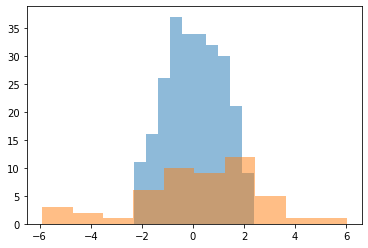

In [240]:
_=plt.hist(x2['x'], alpha=0.5)
_=plt.hist(x2test['x'], alpha=0.5)

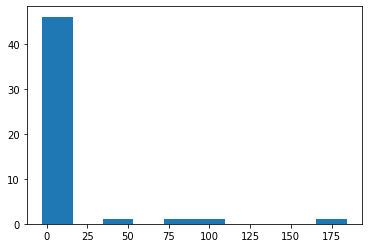

In [253]:
_=plt.hist(y2test.ravel()-yresult2['y'])

In [266]:
_=model2.predict(x2train)

In [264]:
y2['y']-model2.predict(x2train).ravel()

0     0.377747
1    -0.085184
2    -0.807488
3    -0.517098
4     0.083311
        ...   
45    0.115751
46    0.453014
47   -0.487551
48   -0.157515
49    0.545102
Name: y, Length: 250, dtype: float64

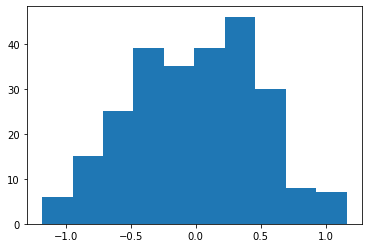

In [267]:
_=plt.hist(y2['y']-model2.predict(x2train).ravel())

In [268]:
np.median(y2test.ravel()-yresult2['y'])

0.18808784093197584

In [275]:
hata=(y2test.ravel()-yresult2['y'])

In [277]:
hata.shape

(50,)

In [272]:
y2test.ravel().shape

(50,)

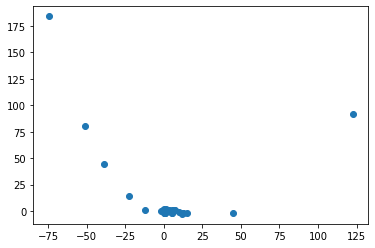

In [276]:
_=plt.scatter(y2test.ravel(),hata)

In [278]:
poly_extreme=pd.read_csv("polytest3.csv")

In [283]:
_=poly_extreme['x']

In [284]:
x_extreme=transformator2.transform(poly_extreme['x'].values.reshape(-1,1))

In [285]:
y_extreme=model2.predict(x_extreme)

In [289]:
model2.score(x_extreme,poly_extreme['y'])

0.213629259621121

In [290]:
r2_score(poly_extreme['y'],y_extreme)

0.213629259621121

In [294]:
gunceldata.shape

(250, 2)

In [298]:
en_guncel_data=pd.concat([polytrain,xtest,polytestresult2,poly_extreme], axis=0) #tüm verileri birleştirdik (200+50+50+50)

In [299]:
en_guncel_data.shape

(350, 2)

In [300]:
en_guncel_x_poly=transformator2.transform(en_guncel_data['x'].values.reshape(-1,1))

In [301]:
en_guncel_y_poly=en_guncel_data['y']

In [302]:
model2.fit(en_guncel_x_poly,en_guncel_y_poly) #modeli baştan eğittik

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [303]:
model2.score(en_guncel_x_poly,en_guncel_y_poly)

0.9035815250086189

In [308]:
en_guncel_tahmin=model2.predict(en_guncel_x_poly)

In [312]:
en_guncel_hata=en_guncel_tahmin-en_guncel_y_poly

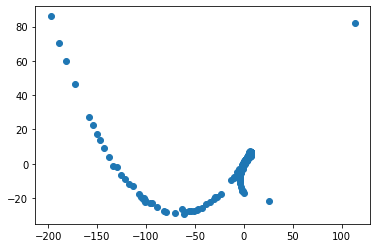

In [313]:
_=plt.scatter(en_guncel_tahmin,en_guncel_hata)

In [314]:
en_guncel_data.to_csv('en_guncel_data.csv')

In [ ]:
###alıştırma####

In [329]:
z=np.linspace(-5,5,1000)

In [330]:
f=1/(1+1/np.exp(z))

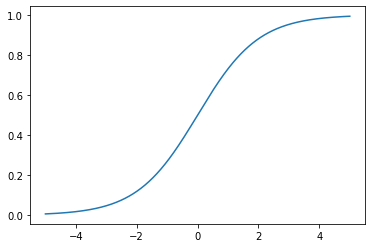

In [331]:
_=plt.plot(z,f)